Akil Bhuiyan


<br>

---

<br>



## **Data Summary & Data Loading**

***```Data Sets:```***

&emsp; &emsp; In this dataset we have total of 205 rows and 26 attributes, the attributes are following: 'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
           'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','wheel-base', 'length',
           'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders','engine-size', 'fuel-system',
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price'. In this data set We used object, int, and float datatypes. This data set consists of three types of entities:

1.  the specification of an auto in terms of various characteristics, 

2. its assigned insurance risk rating, 

3.  its normalized losses in use as compared to other cars.
           
The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. Several of the attributes in the database could be used as a "class" attribute.

<br>

***```Attributes:```*** 

    symboling - (-3 -- 3)

    normalized-losses - (65 -- 256)

    make - Varies brand

    fuel-type - type of fule (diesel, gas)

    aspiration -

    num-of-door - number of door (two doors or four doors)

    body-style hardtop, wagon, sedan, hatchback, convertible

    drive-wheels - 4wd, fwd, rwd

    engine-location - front,rear

    wheel-base - horizontal distance between the center of the front and rear 
    wheels range(86.6, 120,9)

    length - length in inches (141.1,208.1)

    width - widht in inches (60.3,72.3)

    height - height in inches (47.8,59.8)

    curb-weight - weight in lbs (1488,4066)

    engine-type - dohc, dohcv, l, ohc, ohcf, ohcv, rotor

    num-of-cylinders - eight, five, four, six, three, twelve, two

    engine-size - (61,326)

    fuel-system - help transfer feul from the tank to the engine for combustion. 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi,spfi

    bore - diameter of each cylinder (2.54 -- 3.94)

    stroke - the time of the piston moves from the top center to the bottom of the cylinder. (2.07 -- 4.17)

    compression-ratio - ratio of the volume of the cylinder (7 -- 23)

    horsepower - horsepower range (48 -- 288)

    peak-rpm - (4150 -- 6600)

    city-mpg - mile per gallon in city (13 -- 49)

    highway-mpg - mile per gallon in highway (16 -- 54)

    price - price in US dollars (5118 -- 45400)



Importing required libraries

In [ ]:
# All imports
import sklearn.decomposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
# Read csv file
csvv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWLQ9YuKdw79eLIOSUNVgD-mC-6kIn8G5zF2jz-dXxHJgNGljgEYzO9O73b4NS4vXpWWDwvATtY-3D/pub?gid=1857900322&single=true&output=csv'
csvv = 'https://raw.githubusercontent.com/iakil/CSCI381_DataScience/main/Data/automobile.csv'
df = pd.read_csv(csvv)
df.head() 

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


The total of 205 rows and 26 columns or attributes are found in this data set.

In [ ]:
df.shape

(204, 26)

Adding missing Headers:

In this dataset, we had missing headers. In order to fix it, I made a list of column names. and pass that list in the data frame as a header. 

In [ ]:
headerr = ['symboling','normalized-losses','make','fuel-type','aspiration',
           'num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length',
           'width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
           'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df = pd.read_csv(csvv , names=headerr)
df.head() # First Five rows
rawData = df.copy()

In [ ]:
df.tail() # last 5 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
# Check datatypes used by each attributes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#Find the unique number of values for each attribute
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

Now I will find out the total number of '?' and replace that with NaN.
We figured out that the total number of '?' is 59. 

In [ ]:
rawDataQ2 = df.copy()
Q2=df.isnull().sum()
cols = list(df.columns)
for col in cols:
    if('?' in df[col].value_counts()):
        print(col + " -> " + str(df[col].value_counts()['?']))

normalized-losses -> 41
num-of-doors -> 2
bore -> 4
stroke -> 4
horsepower -> 2
peak-rpm -> 2
price -> 4


In [ ]:
i=0
x = df[df =='?'].count()
x = [i for i in x]
total = 0
for i in range(1, len(x)):
    total = total + x[i]
print (f"There are total of {total} '?' symbol in our data set")
df[df =='?'].count()
print (df.isnull().sum())

There are total of 59 '?' symbol in our data set
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [ ]:
cols = list(df.columns)
for col in cols:
    if('?' in df[col].value_counts()):
        print(col + " - " + str(df[col].value_counts()['?']))
df.replace("?", np.NAN, inplace=True)

normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


In [ ]:
df['bore']=pd.to_numeric(df['bore'], errors= 'coerce')
df['stroke']=pd.to_numeric(df['stroke'], errors= 'coerce')
df['horsepower']=pd.to_numeric(df['horsepower'], errors= 'coerce')
df['peak-rpm']=pd.to_numeric(df['peak-rpm'], errors= 'coerce')
df['price']=pd.to_numeric(df['price'], errors = 'coerce')
df['normalized-losses']=pd.to_numeric(df['normalized-losses'],errors = 'coerce')

## **Exploratory Data Analysis (EDA)**

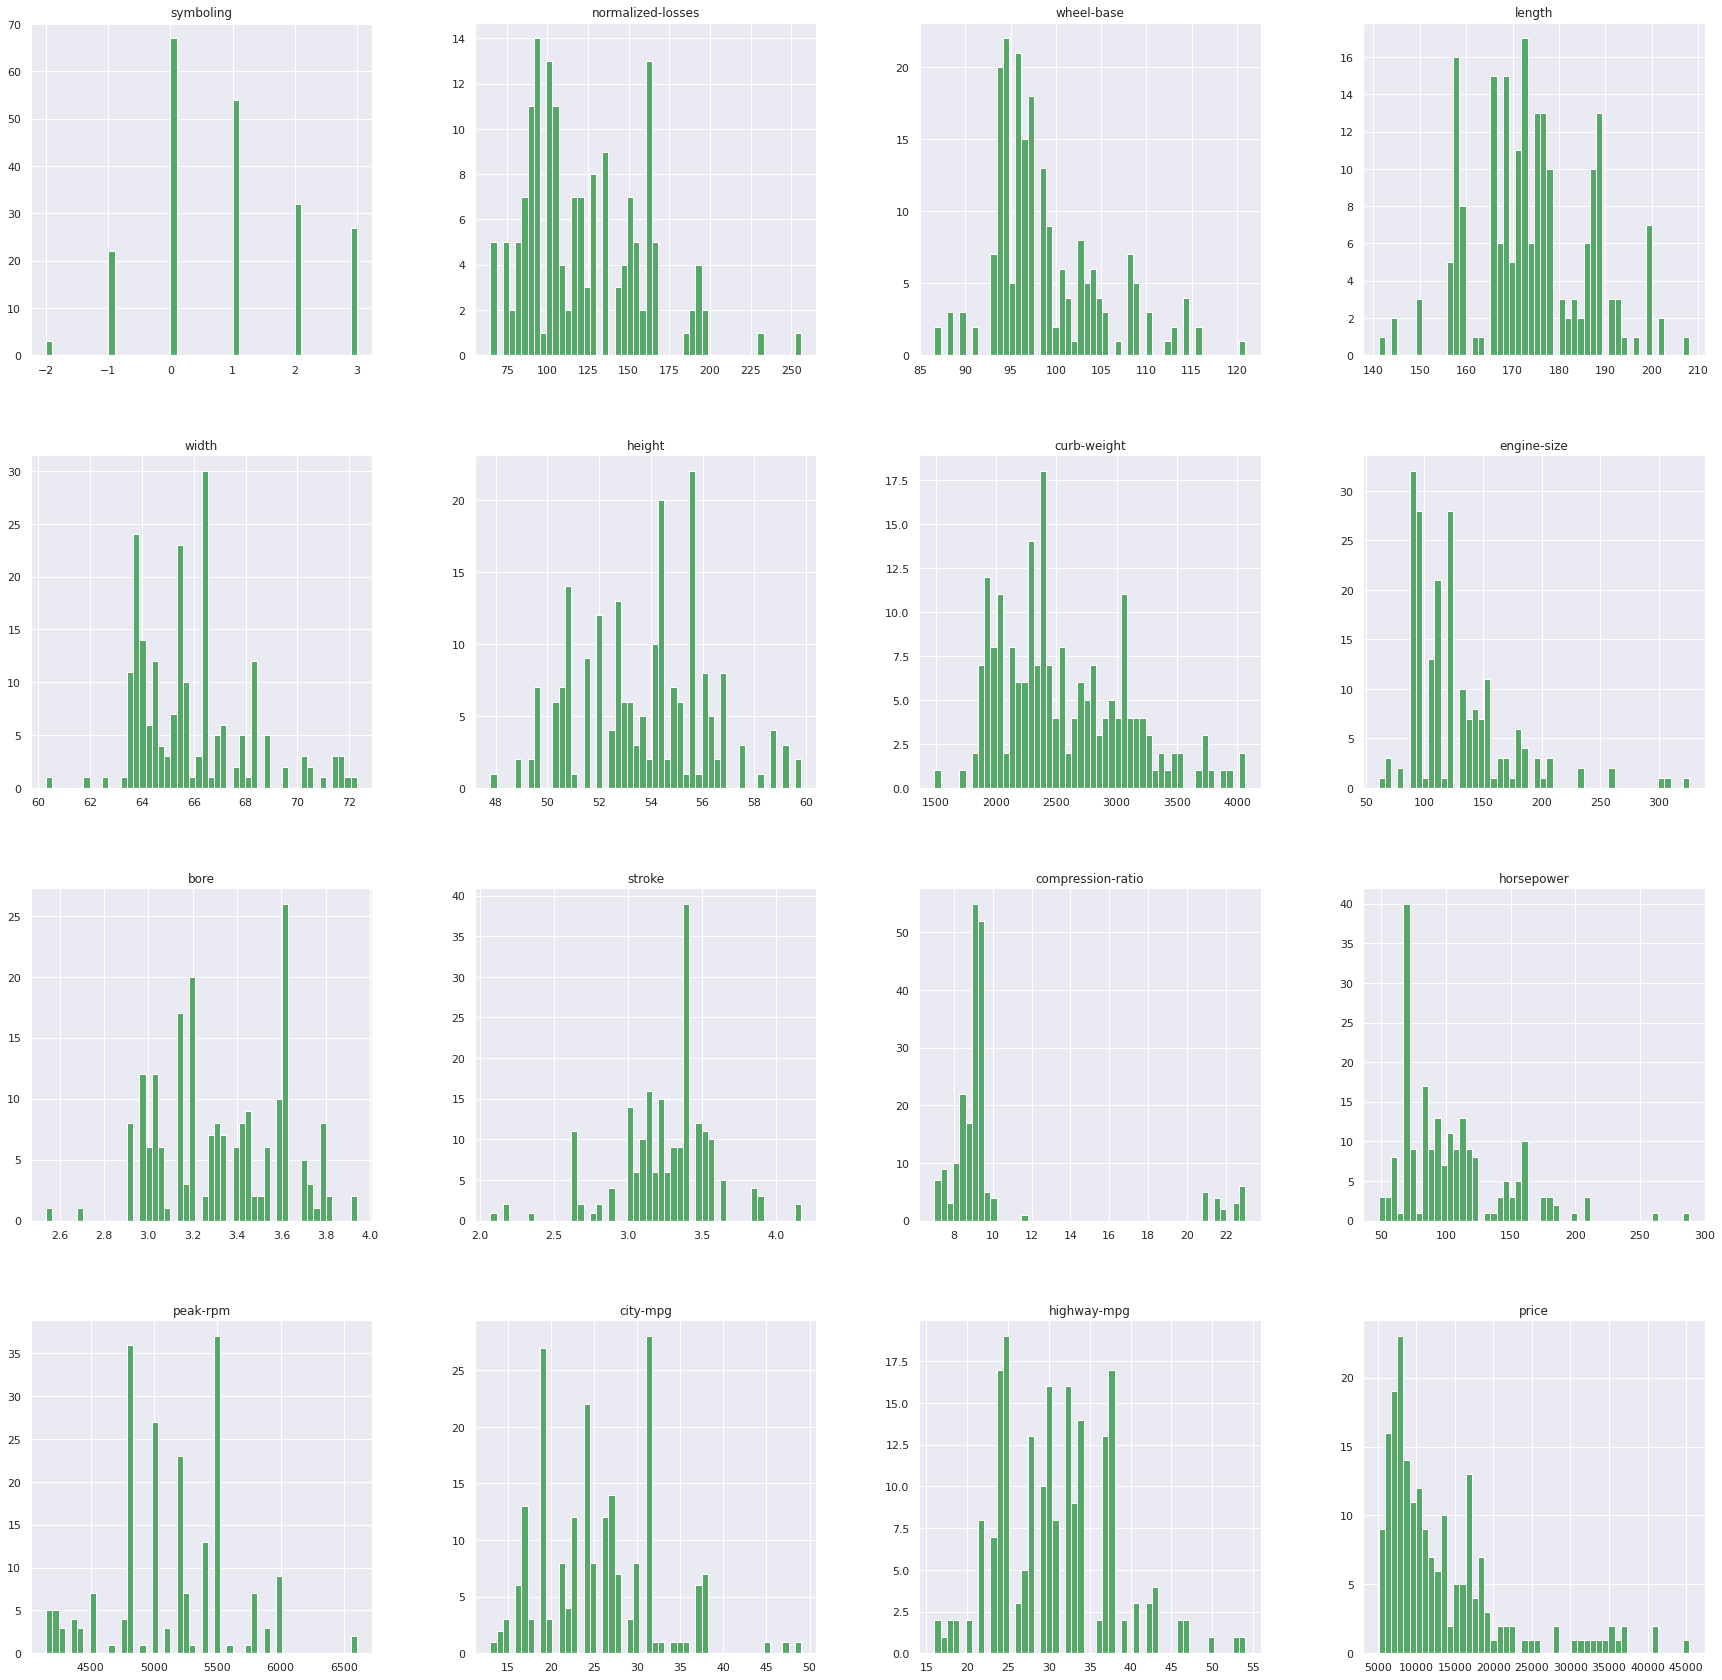

In [ ]:
akilPlotColor = 'g'
numericDataColumns = headerr
vals = df[numericDataColumns].copy()
vals.hist(bins=50, figsize=(30,30) , color = akilPlotColor)
plt.show()

Based on our graph we can visualize that most number of cars are produced by totota followed by nissan, mazda, etc. From the total production of automobiles, toyota by itself produce 15.61%. 

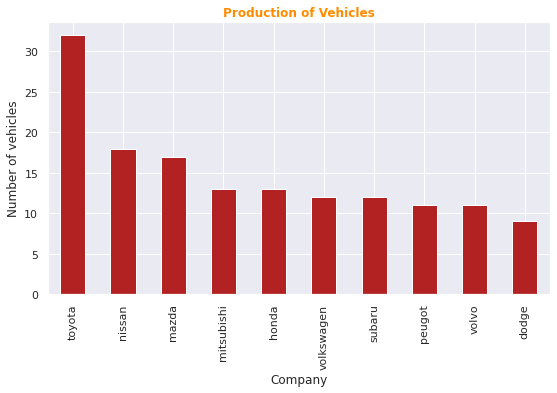

In [ ]:
df.make.value_counts().nlargest (10).plot(kind='bar', figsize=(9,5), color='firebrick')
plt.title("Production of Vehicles", color='darkorange', fontweight="bold")
plt.ylabel('Number of vehicles')
plt.xlabel("Company");

In [ ]:
total=df.make.value_counts().sum()
d=df.make.value_counts()
toyotaPercentage=(d[0]/total)*100 
print(toyotaPercentage)

15.609756097560975


Based on this pie plot we can say that the majorities number of automobiles are produced that run on gas. More specifically, 90.24% of automobiles are run on gas, on the other hand, only 9.76% of vehicle runs on diesel.

Gas:  90.2439024390244 %
Diseal:  9.756097560975604 %


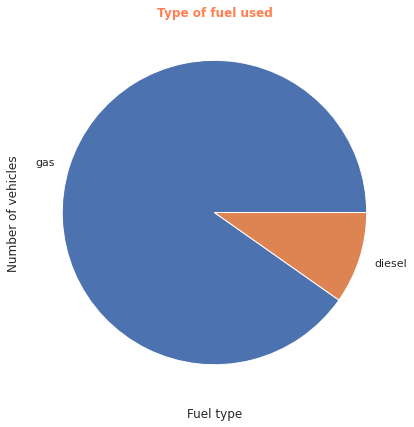

In [ ]:
df['fuel-type'].value_counts().plot.pie (figsize=(7, 7))
plt.title("Type of fuel used", color = 'coral', fontweight="bold")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');
totalFuel=df['fuel-type'].value_counts().sum() 
fuel=df['fuel-type'].value_counts()
gasPercentage=(fuel[0]/totalFuel)*100 
print("Gas: ", gasPercentage, '%')
print("Diseal: ", (100 - gasPercentage),'%')

In this insurance risk ratings of histogram, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Symboling')

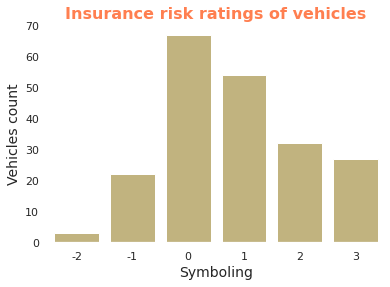

In [ ]:
title_color = "coral"
plot_color = "y"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Insurance risk ratings of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["symboling"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Symboling',fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No of doors')

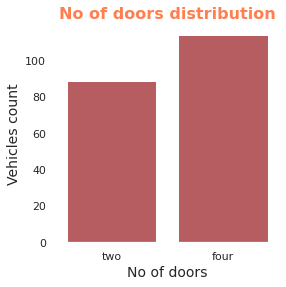

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("No of doors distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)
symbol_dist = sns.countplot(df["num-of-doors"], color='r', ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('No of doors',fontsize=14)


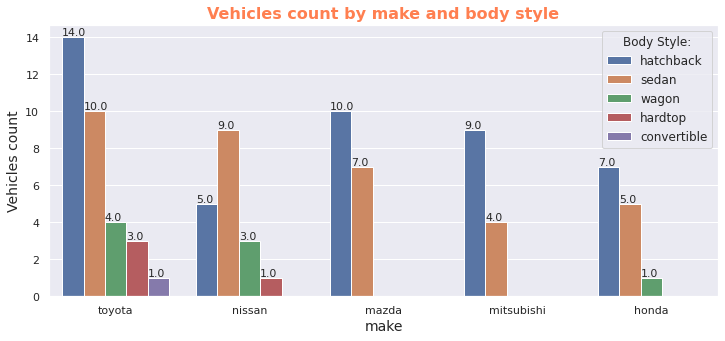

In [ ]:
top_5_makers = df["make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()
fig, ax = plt.subplots(figsize=(12,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Vehicles count by make and body style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=df[df.make.isin(maker_cols)], order=maker_cols, x="make", hue="body-style", ax=ax)
symbol_dist.set_ylabel('Vehicles count', fontsize=14 )
symbol_dist.set_xlabel('make', fontsize=14)
symbol_dist.legend(title="Body Style:", loc="upper right", fontsize="12")
for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

We can find out that the more horsepower the cars have, the more price for the cars go accordingly. The second figure has a strong positive correlation between the price and the size of the engine, where it shows the dependencies between price and engine size. Another figure shows a moderate positive correlation between price, length, width, and height.  

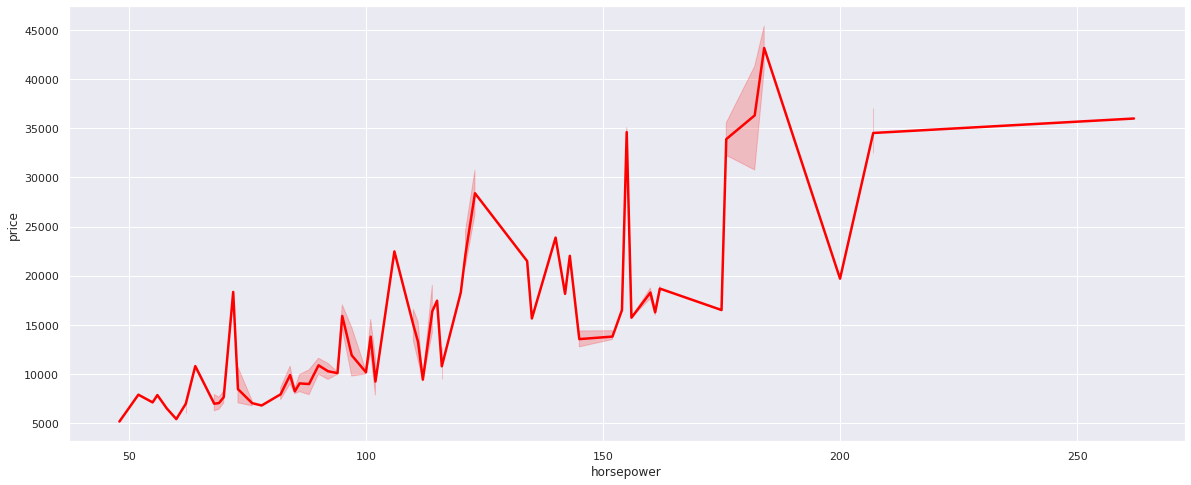

In [ ]:
sns.lineplot(x ="horsepower", y ="price", data=df, color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


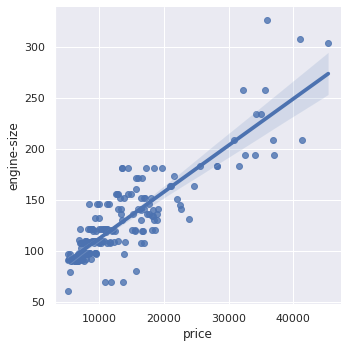

In [ ]:
sns.lmplot('price', "engine-size", data=df)

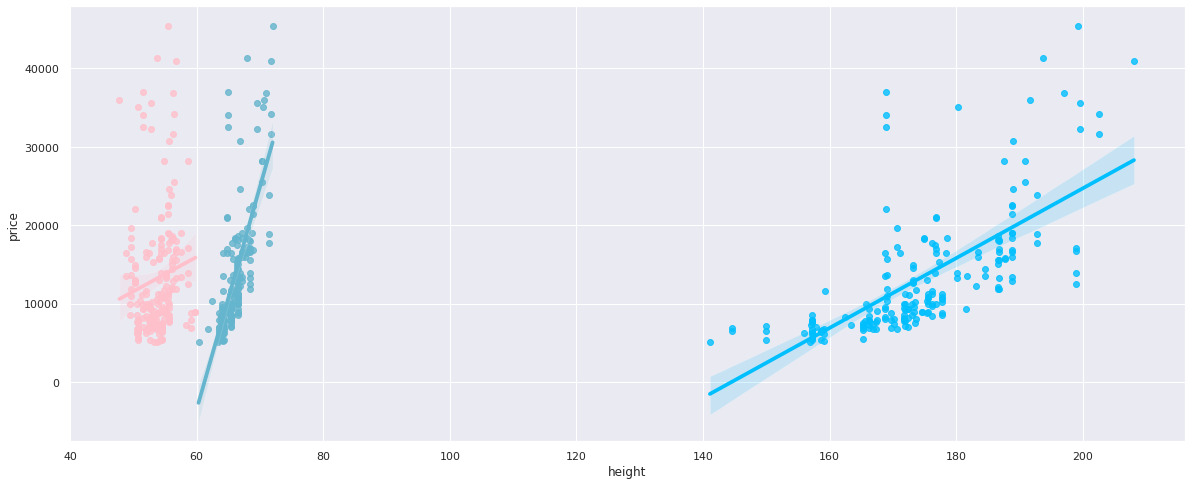

In [ ]:

sns.regplot(x=df['length'], y=df['price'], color='deepskyblue')
sns.regplot(x=df['width'], y=df['price'], color='c')
sns.regplot(x=df['height'], y=df['price'], color='pink')

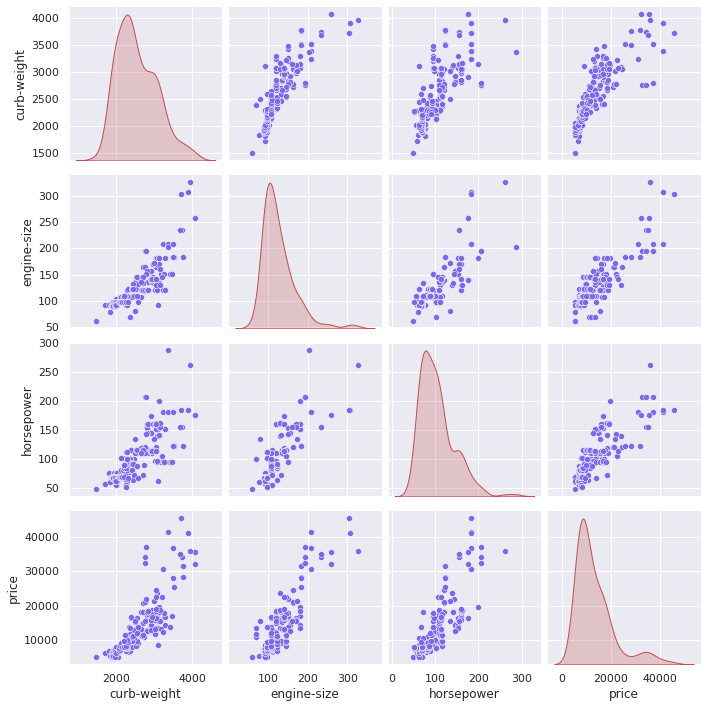

In [ ]:
def DrawPairPlot(dframe, kind, diag_kind, filename):
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color='r', linewidth=1), plot_kws=dict(color='mediumslateblue'))
    plt.savefig(filename, bbox_inches='tight')
cols = ['curb-weight','engine-size', 'horsepower','price']
DrawPairPlot(df[cols], "scatter", "kde", "body-style")

In this boxplot we can see that the automobile from bmw costs more that compared to other companies which is followed by mercury.

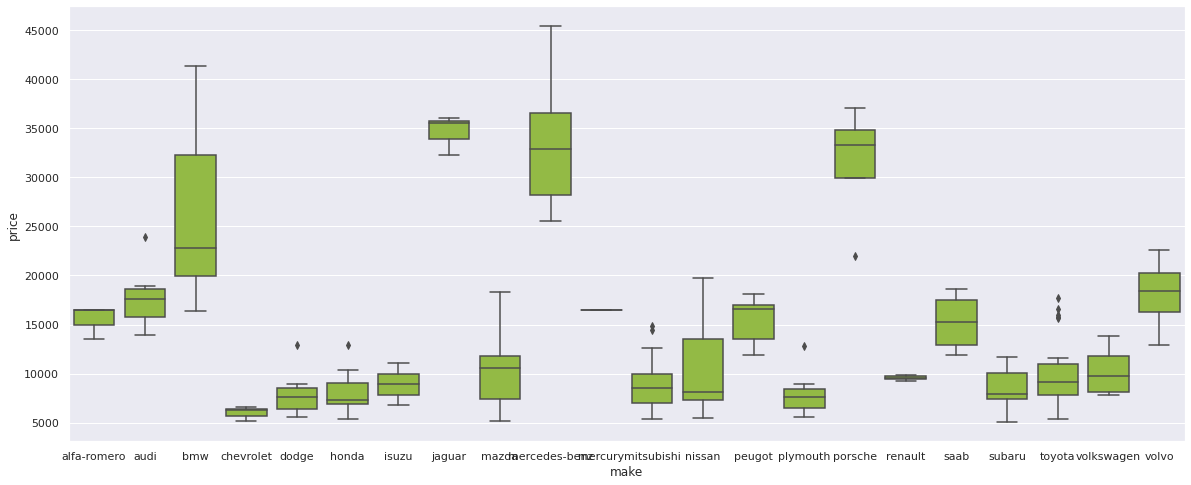

In [ ]:
sns.set(rc={"figure.figsize": (20, 8)}) 
sns.boxplot(x="make", y="price", data=df, color = 'yellowgreen')

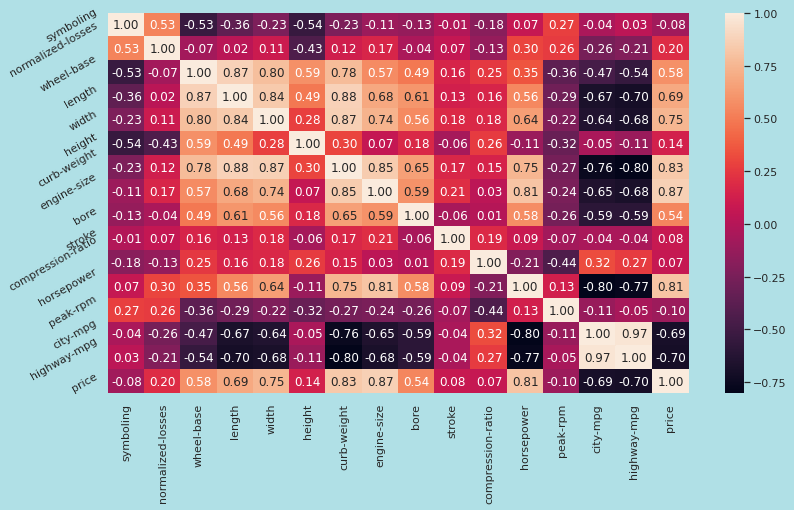

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7), facecolor= 'powderblue')
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## **Data Preparation & Feature Engineering**

#### Q1:
 Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.

> 

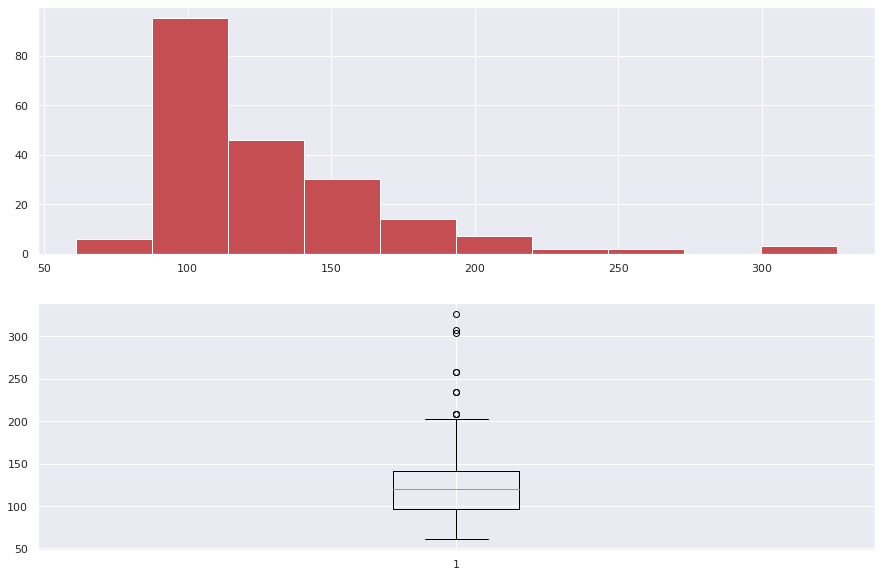

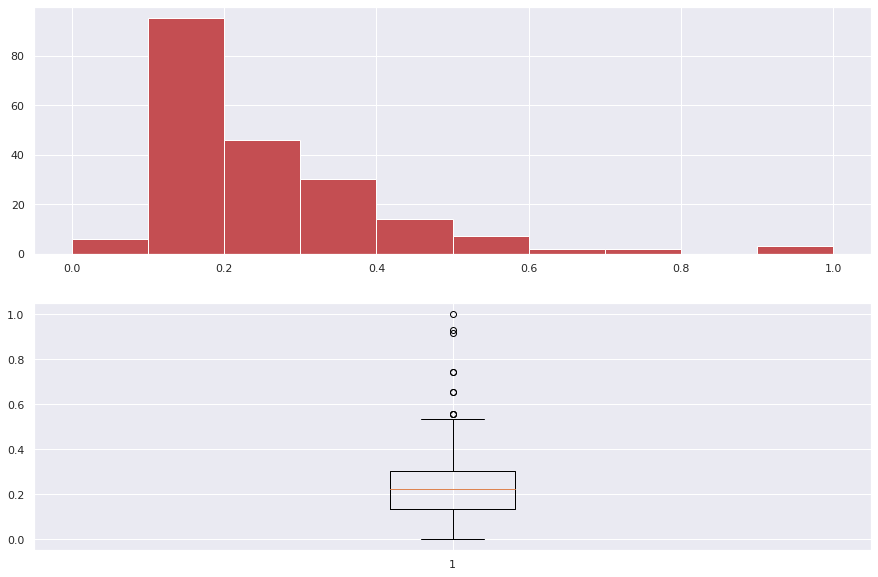

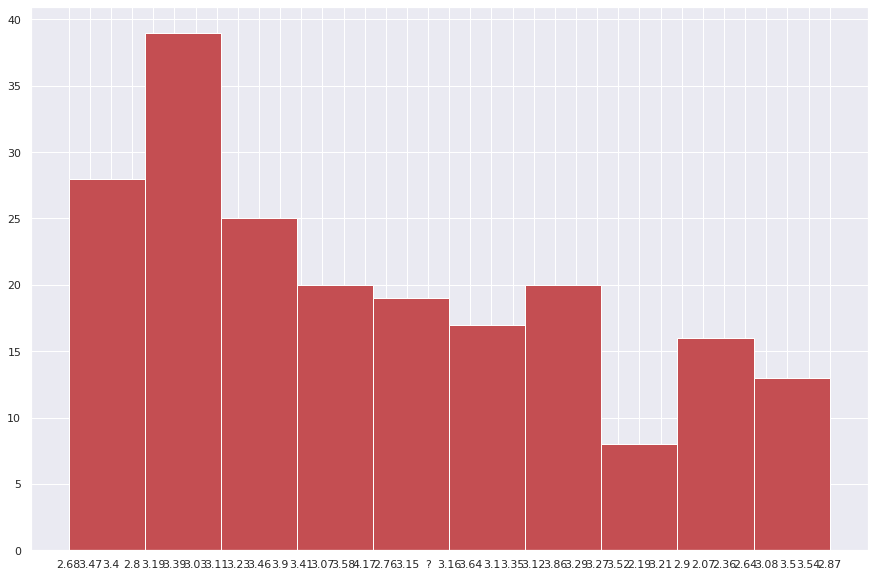

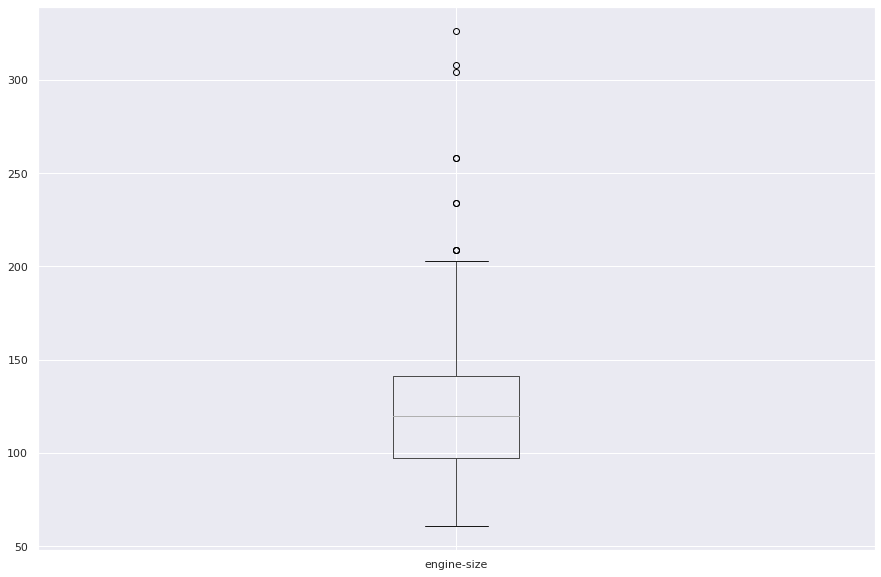

<Figure size 1080x720 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfcp = df.copy()

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(dfcp['engine-size'], color = 'r')
plt.subplot(2,1,2)
plt.boxplot(dfcp['engine-size'])
dfcp['engine-size'] = scaler.fit_transform(dfcp['engine-size'].to_numpy().reshape(-1,1))
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.hist(dfcp['engine-size'], color = 'r')
plt.subplot(2, 1, 2)
plt.boxplot(dfcp['engine-size'])
plt.show()
Trd = rawData[['engine-size','stroke']]
plt.figure(figsize=(15, 10))
Trd['stroke'].hist(color = 'r')
plt.show()
plt.figure(figsize=(15, 10))
Trd.boxplot()
plt.figure(figsize=(15, 10))
plt.show()


#### Q2:
Consider the number-of-doors and price variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

<br>

> 

In [ ]:
Q2

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
res = list(rawDataQ2.columns)
for i in res:
    if('?' in rawDataQ2[i].value_counts()):
      if  i== 'price' or i  == 'num-of-doors':
        print(i + " -> " + str(rawDataQ2[i].value_counts()['?']))

num-of-doors -> 2
price -> 4


#### Q3:

Consider the engine-size and stroke variables: Describe the specific feature scaling method
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables. Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts.
Compare your newly created plots against the plots you created for the original content of the
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If
your feature scaling efforts did not improve the distribution of the data, explain why you believe your
efforts were not effective.

#### Q4:

Consider the symboling, make, and engine-type variables:

##### P1:
A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal

symboling ->  numeric, discrete data.

make -> categorical, nominal data.

engine type -> categorical, ordinal data.

##### P2:

B) For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm.


##### P3:

C) Using your Python skills, apply your prescribed data preparation methodologies to the three
variables. Be sure to show a sample of your results within your Notebook.

#### Q5:

Points) Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use
Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be
sure to include appropriate commentary explaining the dimensionality reduction method you have
elected to implement and discuss the results of your efforts. For example, you should explain how
many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

In [ ]:
sbheaderr = ['wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','horsepower','peak-rpm','city-mpg']
rawData.columns = headerr
rawDataA = rawData[sbheaderr]
rawDataA['horsepower']=pd.to_numeric(df['horsepower'], errors= 'coerce')
rawDataA['peak-rpm']=pd.to_numeric(df['peak-rpm'], errors= 'coerce')
rawDataA['horsepower'].fillna(df['horsepower'].median(), inplace=True)
rawDataA['peak-rpm'].fillna(df['peak-rpm'].median(), inplace=True)
ress = sklearn.decomposition.PCA(n_components=2)
ress.fit(rawDataA)
print(ress.explained_variance_ratio_)

[0.63817326 0.35973576]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

As we can see, the first variance is around 64% and adding the secornd one it become closer to 99% variance. 

## The Conclusion

In conclusion, we can make an statement that Toyota manufactures most of the automobile vehicles than the others. Production of automobiles which runs on Gas is far more than those that runs on Diesel. An automobile price depends on its Dimensions, Wheel-base, Curb-weight, number-of-cylinders, bore, stroke, HP.

## References

[Quiz2.pdf](https://drive.google.com/file/d/11__fPy3QjrlQm7RaNEWp1uvlYPX9JUo4/view?usp=sharing)

[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile)

https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/ 

https://medium.com/@jagadeeshundavalli02/eda-on-automobile-prices-1f0657e069bf

https://www.kaggle.com/code/toramky/eda-for-automobile-dataset/notebook 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
